# Predict the Automobile Insurance Claim:

The purpose of an Insurance is to provide protection against the risk of any financial loss. 
Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future
events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be
provided with Automobile insurance claim dataset.

One has to predict the claim amount in the Automobile insurance dataset. 
So here we will different regression methods to predict the claim amount.

# 1-Data Exploration (Reading the data and Attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the insurance data
insuranceclaim=pd.read_csv('Auto_Insurance_Claims_Amount.csv')
print(insuranceclaim.shape)

(9134, 26)


In [3]:
#printing the data
print(insuranceclaim.head())

  Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                   

# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [4]:
#checking the information of the data
insuranceclaim.info()

#so by looking the information, here there are no missing data in any attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [5]:
#lets see what are the types of data are present in each attribute

for columns in insuranceclaim:
    print("Column Name:",columns)
    print(np.unique(insuranceclaim[columns], return_counts=True))
    print(insuranceclaim[columns].value_counts())
    print("\n")

Column Name: Customer
(array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
       'ZZ97035'], dtype=object), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
YI95574    1
TV97612    1
EI91403    1
VO87785    1
DE59454    1
          ..
EO24423    1
AL35726    1
AZ15952    1
VY90611    1
UV99893    1
Name: Customer, Length: 9134, dtype: int64


Column Name: Country
(array(['US'], dtype=object), array([9134], dtype=int64))
US    9134
Name: Country, dtype: int64


Column Name: State Code
(array(['IA', 'KS', 'MO', 'NE', 'OK'], dtype=object), array([2601,  798, 3150, 1703,  882], dtype=int64))
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64


Column Name: State
(array(['Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma'], dtype=object), array([2601,  798, 3150, 1703,  882], dtype=int64))
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64


Column Name: Claim Amount
(array([ 189.8007

In [6]:
#lets see all the attributes whose data type is object
columnsnames = insuranceclaim.dtypes[insuranceclaim.dtypes == np.object]
print(columnsnames)

Customer             object
Country              object
State Code           object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Claim Reason         object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object


In [7]:
#so here for building the model we will not require Customer, Country, State and Effective To Date attributes.
#so we can drop them from our dataset and for other attributes we can use label encoder for encoding the data.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

insuranceclaim['State Code']=le.fit_transform(insuranceclaim['State Code'])
print(insuranceclaim['State Code'].value_counts())
print('\n')

insuranceclaim['Response']=le.fit_transform(insuranceclaim['Response'])
print(insuranceclaim['Response'].value_counts())
print('\n')

insuranceclaim['Coverage']=le.fit_transform(insuranceclaim['Coverage'])
print(insuranceclaim['Coverage'].value_counts())
print('\n')

insuranceclaim['Education']=le.fit_transform(insuranceclaim['Education'])
print(insuranceclaim['Education'].value_counts())
print('\n')

insuranceclaim['EmploymentStatus']=le.fit_transform(insuranceclaim['EmploymentStatus'])
print(insuranceclaim['EmploymentStatus'].value_counts())
print('\n')

insuranceclaim['Gender']=le.fit_transform(insuranceclaim['Gender'])
print(insuranceclaim['Gender'].value_counts())
print('\n')

insuranceclaim['Location Code']=le.fit_transform(insuranceclaim['Location Code'])
print(insuranceclaim['Location Code'].value_counts())
print('\n')

insuranceclaim['Marital Status']=le.fit_transform(insuranceclaim['Marital Status'])
print(insuranceclaim['Marital Status'].value_counts())
print('\n')

insuranceclaim['Policy Type']=le.fit_transform(insuranceclaim['Policy Type'])
print(insuranceclaim['Policy Type'].value_counts())
print('\n')

insuranceclaim['Policy']=le.fit_transform(insuranceclaim['Policy'])
print(insuranceclaim['Policy'].value_counts())
print('\n')

insuranceclaim['Claim Reason']=le.fit_transform(insuranceclaim['Claim Reason'])
print(insuranceclaim['Claim Reason'].value_counts())
print('\n')

insuranceclaim['Sales Channel']=le.fit_transform(insuranceclaim['Sales Channel'])
print(insuranceclaim['Sales Channel'].value_counts())
print('\n')

insuranceclaim['Vehicle Class']=le.fit_transform(insuranceclaim['Vehicle Class'])
print(insuranceclaim['Vehicle Class'].value_counts())
print('\n')

insuranceclaim['Vehicle Size']=le.fit_transform(insuranceclaim['Vehicle Size'])
print(insuranceclaim['Vehicle Size'].value_counts())
print('\n')


2    3150
0    2601
3    1703
4     882
1     798
Name: State Code, dtype: int64


0    7826
1    1308
Name: Response, dtype: int64


0    5568
1    2742
2     824
Name: Coverage, dtype: int64


0    2748
1    2681
3    2622
4     741
2     342
Name: Education, dtype: int64


1    5698
4    2317
2     432
0     405
3     282
Name: EmploymentStatus, dtype: int64


0    4658
1    4476
Name: Gender, dtype: int64


1    5779
0    1773
2    1582
Name: Location Code, dtype: int64


1    5298
2    2467
0    1369
Name: Marital Status, dtype: int64


1    6788
0    1968
2     378
Name: Policy Type, dtype: int64


5    3426
4    2122
3    1240
2    1014
1     595
0     359
7     164
8     148
6      66
Name: Policy, dtype: int64


0    3752
1    2926
3    1432
2    1024
Name: Claim Reason, dtype: int64


0    3477
1    2567
2    1765
3    1325
Name: Sales Channel, dtype: int64


0    4621
5    1886
3    1796
4     484
2     184
1     163
Name: Vehicle Class, dtype: int64


1    6424
2    1764
0 

In [8]:
#again checking the information of the data
insuranceclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   int32  
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   int32  
 6   Coverage                       9134 non-null   int32  
 7   Education                      9134 non-null   int32  
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   int32  
 10  Gender                         9134 non-null   int32  
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   i

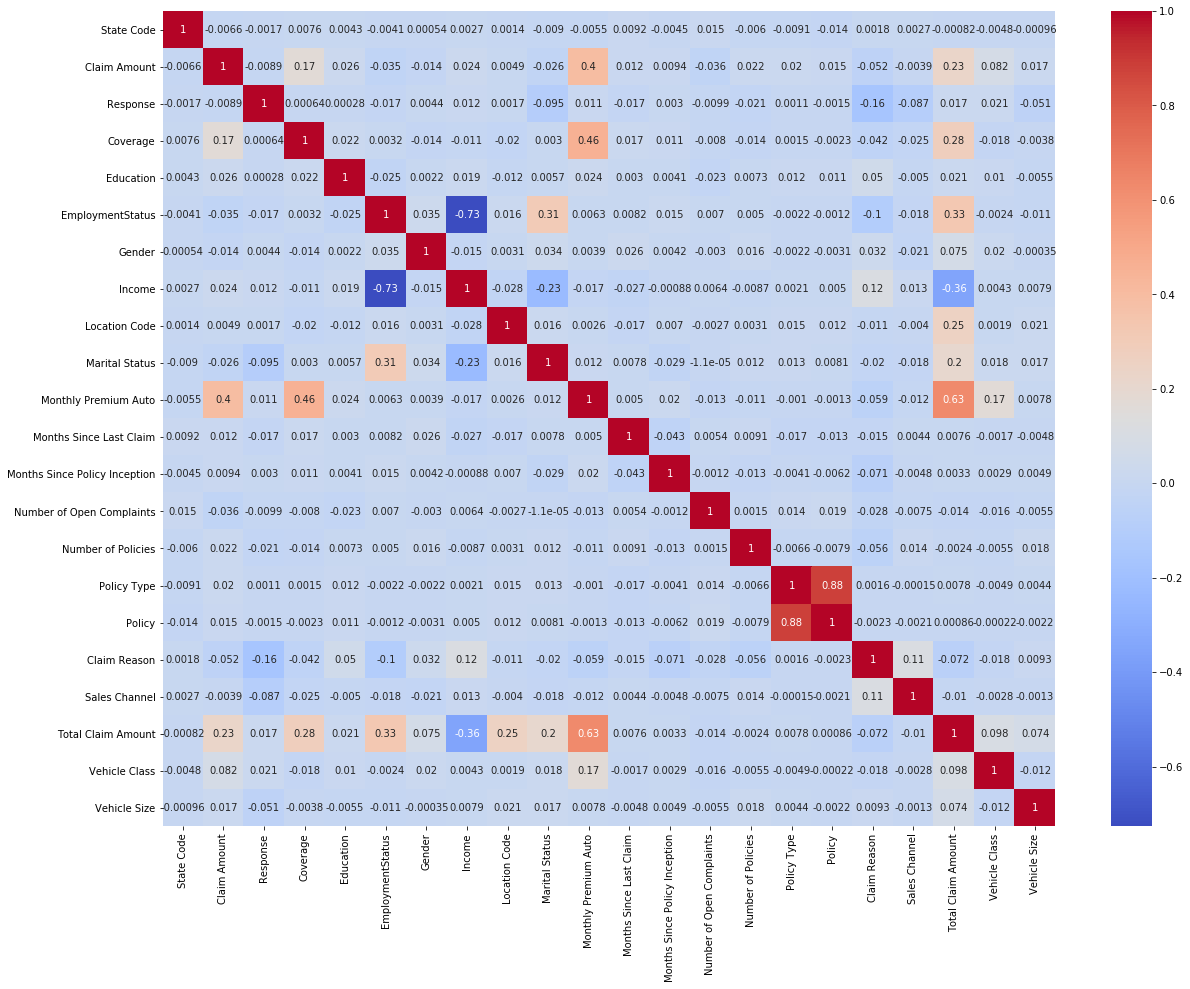

In [9]:
#lets see the corelation among data
plt.figure(figsize=(20,15))
sns.heatmap(insuranceclaim.corr(),cmap='coolwarm',annot=True)

#so by looking the corelation of data, we can say that all most every data is some how corelated with each other.

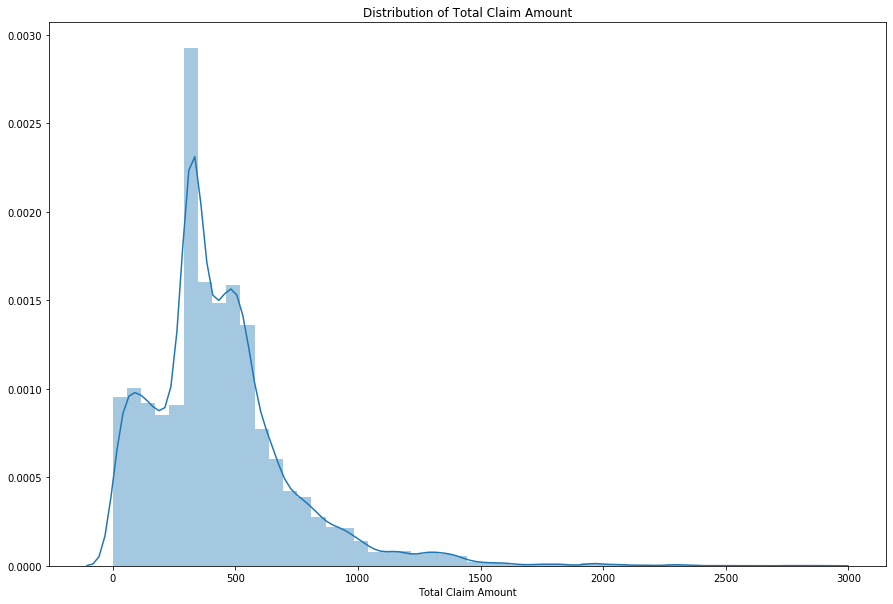

In [10]:
# now lets see the distribution of "Total Claim Amount"
plt.figure(figsize=(15,10))
plt.title('Distribution of Total Claim Amount')
sns.distplot(insuranceclaim['Total Claim Amount'])

#so by looking this the data is skewed, so we will treat them later.

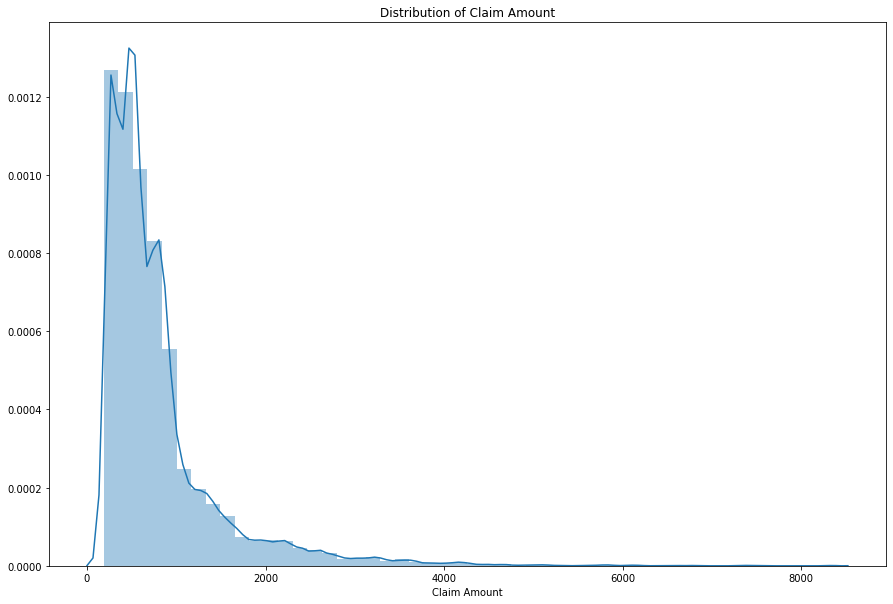

In [11]:
# now lets see the distribution of "Claim Amount"
plt.figure(figsize=(15,10))
plt.title('Distribution of Claim Amount')
sns.distplot(insuranceclaim['Claim Amount'])

#so by looking this the data is skewed, so we will treat them later.

      State  Claim Amount
0  Missouri  2.521149e+06
1      Iowa  2.101062e+06
2  Nebraska  1.338786e+06
3  Oklahoma  7.106015e+05
4    Kansas  6.401135e+05


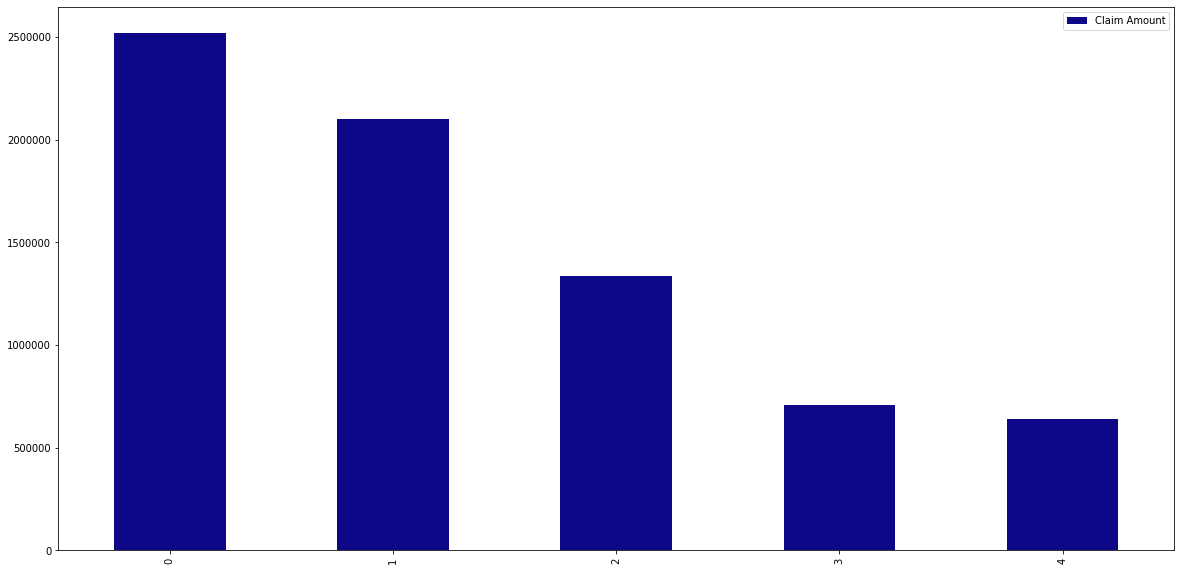

In [12]:
#lets see the states where number of claim amount is more

top_cases=insuranceclaim[['Claim Amount','State']].groupby('State').sum().sort_values('Claim Amount',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()


In [13]:
#so here for building the model we will not require Customer, Country, State and Effective To Date attributes.
#so we can drop them from our dataset

#also wee saw that Education, Gender, Maritial Status and Policy Type is not required for 
#claming the amount, so can drop them also.

insurance=insuranceclaim.drop(columns=['Customer','Country','State','Effective To Date','Education','Gender','Marital Status','Policy Type','Claim Amount','Number of Open Complaints','Vehicle Size'])
print(insurance.shape)
print(insurance.head())


(9134, 15)
   State Code  Response  Coverage  EmploymentStatus  Income  Location Code  \
0           1         0         0                 1   56274              1   
1           3         0         1                 4       0              1   
2           4         0         2                 1   48767              1   
3           2         0         0                 4       0              1   
4           1         0         0                 1   43836              0   

   Monthly Premium Auto  Months Since Last Claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   Months Since Policy Inception  Number of Policies  Policy  Claim Reason  \
0                              5                   1       2             0   
1                             42                   

State Code                          AxesSubplot(0.125,0.125;0.0435393x0.755)
Response                         AxesSubplot(0.177247,0.125;0.0435393x0.755)
Coverage                         AxesSubplot(0.229494,0.125;0.0435393x0.755)
EmploymentStatus                 AxesSubplot(0.281742,0.125;0.0435393x0.755)
Income                           AxesSubplot(0.333989,0.125;0.0435393x0.755)
Location Code                    AxesSubplot(0.386236,0.125;0.0435393x0.755)
Monthly Premium Auto             AxesSubplot(0.438483,0.125;0.0435393x0.755)
Months Since Last Claim           AxesSubplot(0.49073,0.125;0.0435393x0.755)
Months Since Policy Inception    AxesSubplot(0.542978,0.125;0.0435393x0.755)
Number of Policies               AxesSubplot(0.595225,0.125;0.0435393x0.755)
Policy                           AxesSubplot(0.647472,0.125;0.0435393x0.755)
Claim Reason                     AxesSubplot(0.699719,0.125;0.0435393x0.755)
Sales Channel                    AxesSubplot(0.751966,0.125;0.0435393x0.755)

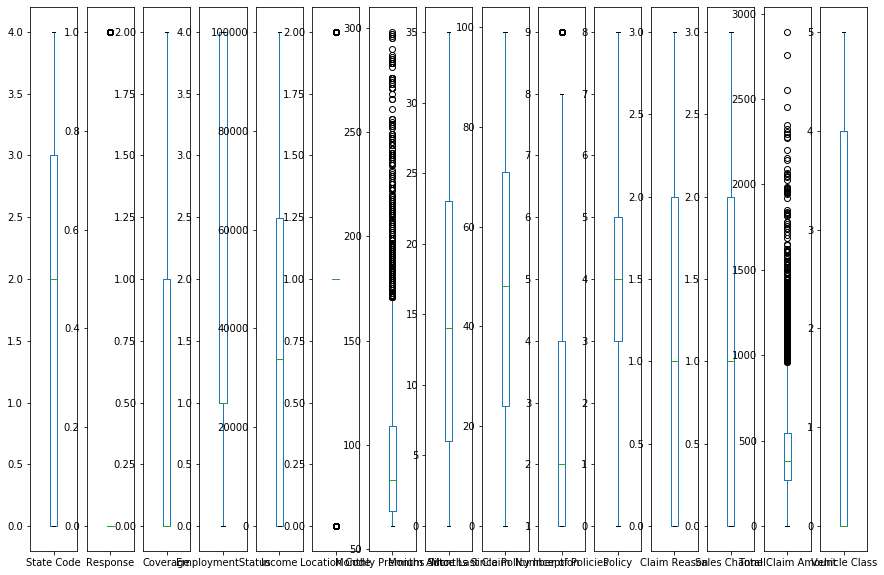

In [14]:
#checking the outliers with box plot
insurance.plot(kind='box',subplots=True, figsize=(15,10))

In [15]:
#so here we saw there are few outliers present in the dataset, so lets remove them using z score
from scipy.stats import zscore
print(insurance.shape)
z_score=abs(zscore(insurance))
print('Z Score is:','\n',z_score)
insurance_final=insurance.loc[(z_score<3).all(axis=1)]
print(insurance_final.shape)
print(insurance_final.head(5))

(9134, 15)
Z Score is: 
 [[0.55068994 0.40882171 0.73289946 ... 1.03113846 0.16963969 1.49918077]
 [0.97332215 0.40882171 0.79199887 ... 1.03113846 2.400737   0.91292371]
 [1.73532819 0.40882171 2.31689721 ... 1.03113846 0.45573376 1.49918077]
 ...
 [0.21131611 0.40882171 0.79199887 ... 0.09602938 1.22793667 0.91292371]
 [0.21131611 0.40882171 0.79199887 ... 0.09602938 0.88511256 0.91292371]
 [0.21131611 0.40882171 0.79199887 ... 0.83907971 0.22200449 1.49918077]]
(8847, 15)
   State Code  Response  Coverage  EmploymentStatus  Income  Location Code  \
0           1         0         0                 1   56274              1   
1           3         0         1                 4       0              1   
2           4         0         2                 1   48767              1   
3           2         0         0                 4       0              1   
4           1         0         0                 1   43836              0   

   Monthly Premium Auto  Months Since Last Claim  \

In [16]:
#checking the skewness of the dataset
insurance_final.skew()

State Code                       0.018978
Response                         2.038764
Coverage                         1.070752
EmploymentStatus                 0.851963
Income                           0.279978
Location Code                    0.011758
Monthly Premium Auto             1.295338
Months Since Last Claim          0.280454
Months Since Policy Inception    0.042211
Number of Policies               1.258752
Policy                          -0.422734
Claim Reason                     0.728170
Sales Channel                    0.501725
Total Claim Amount               0.715965
Vehicle Class                    0.386585
dtype: float64

In [17]:
# so here there are few variable where the skewness is more than 0.55, so we have to treat them.
# treating the skewness using log
import numpy as np
for col in insurance_final.columns:
    if insurance_final.skew().loc[col]>0.55:
        insurance_final[col]=np.log1p(insurance_final[col])

In [18]:
#again checking the skewness of the dataset
insurance_final.skew()

State Code                       0.018978
Response                         2.038764
Coverage                         0.740506
EmploymentStatus                 0.414753
Income                           0.279978
Location Code                    0.011758
Monthly Premium Auto             0.662589
Months Since Last Claim          0.280454
Months Since Policy Inception    0.042211
Number of Policies               0.659125
Policy                          -0.422734
Claim Reason                     0.218867
Sales Channel                    0.501725
Total Claim Amount              -1.922428
Vehicle Class                    0.386585
dtype: float64

In [19]:
# separating the input and output/target variables
df_x=insurance_final.drop(columns=['Total Claim Amount'])
y=insurance_final[['Total Claim Amount']]

print(df_x.shape)
print(y.shape)

(8847, 14)
(8847, 1)


In [20]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# 3-Building Different Model and Finding the Best Model

In [21]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(8847, 14)
(8847, 1)


In [22]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [102]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [103]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 75


R2 Score is: 0.4979103804536318




************************ KNeighborsRegressor **********************


Final Random State is: 100


R2 Score is: 0.6710170435752034




************************ Lasso **********************


Final Random State is: 100


R2 Score is: 0.0




************************ Ridge **********************


Final Random State is: 75


R2 Score is: 0.4979111328250754




************************ GradientBoostingRegressor **********************


Final Random State is: 81


R2 Score is: 0.7640412652373068




************************ AdaBoostRegressor **********************


Final Random State is: 87


R2 Score is: 0.6663359479595925




************************ RandomForestRegressor **********************


Final Random State is: 88


R2 Score is: 0.7820184865305215






In [104]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            75  49.791038
1        KNeighborsRegressor           100  67.101704
2                      Lasso           100   0.000000
3                      Ridge            75  49.791113
4  GradientBoostingRegressor            81  76.404127
5          AdaBoostRegressor            87  66.633595
6      RandomForestRegressor            88  78.201849


In [105]:
# So here RandomForestRegressor is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
parameters={'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}
clf=GridSearchCV(rfreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 1400}

In [23]:
# So lets build the final model with n_estimators=1400 and random_state=88

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
rfreg=RandomForestRegressor(n_estimators=1400,random_state=88)
rfreg.fit(x_train,y_train)
y_pred=rfreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score is: 0.7148407363886347
RMSE is: 0.4831799990397863


In [110]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of RandomForestRegressor is:', cross_val_score(rfreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of RandomForestRegressor is:',cross_val_score(rfreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of RandomForestRegressor is: 0.7415442715539788
Standard Deviation of RandomForestRegressor is: 0.011415528969623603


In [111]:
#lets predict the Avarage Price value
print('Actual Avarage Price:\n',y_test)
print('Predicted Avarage Price:\n',y_pred)

#So by looking this we can conclude that our model is predicting around 86% of correct results 
#for predicting the claim amount auto insurance.

Actual Avarage Price:
       Total Claim Amount
2896            6.270988
1630            6.153220
7349            5.746203
2790            6.284284
5495            4.184284
...                  ...
4539            6.041126
319             4.053580
2061            6.157086
7692            6.619807
7273            6.377843

[1770 rows x 1 columns]
Predicted Avarage Price:
 [6.59193729 6.60990819 6.12631192 ... 5.98517895 6.28700669 6.24539143]


In [112]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(rfreg,'rfreg_claimamount.obj')

['rfreg_claimamount.obj']

In [113]:
# load the model from the file
ClaimAmount_from_joblib=joblib.load('rfreg_claimamount.obj')

In [114]:
#Use the loaded model to make predictions against test data
ClaimAmount_from_joblib.predict(x_test)

array([6.59193729, 6.60990819, 6.12631192, ..., 5.98517895, 6.28700669,
       6.24539143])

# Conclusion:
    
So here 'RandomForestRegressor Model' is the best model out of all model tested above and by looking this we can 
conclude that our model is predicting around 80% of correct results for predicting the Claim Amount  of Auto Insurance.